In [1]:
import pennylane as qml
from pennylane import qchem
from pennylane import numpy as np
import matplotlib.pyplot as plt
A_to_au_conversion = 1.8897259885789

In [2]:
r = 0.742
symbols = ["H", "H"]
geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, r*A_to_au_conversion])
H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry)
print("Number of qubits = ", qubits)
print("The Hamiltonian is ", H)

Number of qubits =  4
The Hamiltonian is    (-0.2225098666481647) [Z3]
+ (-0.22250986664816463) [Z2]
+ (-0.09963186538176191) [I0]
+ (0.17110569283214036) [Z0]
+ (0.17110569283214036) [Z1]
+ (0.12051037033744402) [Z0 Z2]
+ (0.12051037033744402) [Z1 Z3]
+ (0.16584097082970475) [Z0 Z3]
+ (0.16584097082970475) [Z1 Z2]
+ (0.16859357109492182) [Z0 Z1]
+ (0.17432084502934375) [Z2 Z3]
+ (-0.04533060049226072) [Y0 Y1 X2 X3]
+ (-0.04533060049226072) [X0 X1 Y2 Y3]
+ (0.04533060049226072) [Y0 X1 X2 Y3]
+ (0.04533060049226072) [X0 Y1 Y2 X3]


In [3]:
qubits = 4
electrons = 2

dev = qml.device('default.qubit', wires=qubits)

hf = qml.qchem.hf_state(electrons, qubits)

def circuit(params, wires=qubits):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(params, wires=[0,1,2,3])

cost_fn = qml.ExpvalCost(circuit, H, dev)

opt = qml.AdamOptimizer(stepsize=0.01)
np.random.seed(0)
params = np.random.normal(0, np.pi, (qubits, 3))

/home/azhar04/anaconda3/envs/quantum-dev-2/lib/python3.11/site-packages/pennylane/vqe/vqe.py:155: PennyLaneDeprecationWarning: ExpvalCost is deprecated, use qml.expval() instead. For optimizing Hamiltonian measurements with measuring commuting terms in parallel, use the grouping_type keyword in qml.Hamiltonian.
  warnings.warn(


In [8]:
def calc_vqe_H(r):
    symbols = ["H", "H"]
    geometry = np.array([0.0, 0.0, 0.0, 0.0, 0.0, r*A_to_au_conversion])
    H, qubits = qml.qchem.molecular_hamiltonian(symbols, geometry)
    print("Number of qubits = ", qubits)
    print("The Hamiltonian is ", H)
    
    dev = qml.device("lightning.qubit", wires=qubits)
    electrons = 2
    hf = qml.qchem.hf_state(electrons, qubits)

    def circuit(param, wires):
        qml.BasisState(hf, wires=wires)
        qml.DoubleExcitation(param, wires=[0, 1, 2, 3])

    @qml.qnode(dev, interface="autograd")
    def cost_fn(param):
        circuit(param, wires=range(qubits))
        return qml.expval(H)

    opt = qml.GradientDescentOptimizer(stepsize=0.4)
    theta = np.array(0.0, requires_grad=True)

    # store the values of the cost function
    energy = [cost_fn(theta)]
    # store the values of the circuit parameter
    angle = [theta]
    max_iterations = 100
    conv_tol = 1e-06

    for n in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost_fn, theta)

        energy.append(cost_fn(theta))
        angle.append(theta)

        conv = np.abs(energy[-1] - prev_energy)

        if n % 2 == 0:
            print(f"Step = {n},  Energy = {energy[-1]:.8f} Ha")

        if conv <= conv_tol:
            break

    return energy, angle, n

r = np.linspace(0.1, 3.0, 30)
vqe_energy = []
for i in range(len(r)):
    energy, angle, n = calc_vqe_H(r[i])
    print(r[i])
    print(energy)
    vqe_energy.append(energy[-1])

Number of qubits =  4
The Hamiltonian is    (-0.7264767836816364) [Z2]
+ (-0.7264767836816364) [Z3]
+ (0.300837892725335) [Z0]
+ (0.300837892725335) [Z1]
+ (5.060741188068732) [I0]
+ (0.15204536079818798) [Z0 Z2]
+ (0.15204536079818798) [Z1 Z3]
+ (0.1910879257375826) [Z0 Z3]
+ (0.1910879257375826) [Z1 Z2]
+ (0.19297139926821077) [Z0 Z1]
+ (0.20307111150418677) [Z2 Z3]
+ (-0.03904256493939462) [Y0 Y1 X2 X3]
+ (-0.03904256493939462) [X0 X1 Y2 Y3]
+ (0.03904256493939462) [Y0 X1 X2 Y3]
+ (0.03904256493939462) [X0 Y1 Y2 X3]
Step = 0,  Energy = 2.71014601 Ha
Step = 2,  Energy = 2.70996133 Ha
0.1
[array(2.71588777), array(2.71014601), array(2.70996686), array(2.70996133), array(2.70996116)]
Number of qubits =  4
The Hamiltonian is    (-0.6482825610067343) [Z2]
+ (-0.6482825610067343) [Z3]
+ (0.2822059701240905) [Z0]
+ (0.2822059701240905) [Z1]
+ (2.310257002954364) [I0]
+ (0.14936430842143078) [Z0 Z2]
+ (0.14936430842143078) [Z1 Z3]
+ (0.18885748545138803) [Z0 Z3]
+ (0.18885748545138803) [Z1 

In [7]:
vqe_energy

[[array(2.71588777),
  array(2.71014601),
  array(2.70996686),
  array(2.70996133),
  array(2.70996116)],
 [array(0.16417519),
  array(0.15791375),
  array(0.15750993),
  array(0.15748408),
  array(0.15748242),
  array(0.15748232)],
 [array(-0.59382766),
  array(-0.60082051),
  array(-0.60168316),
  array(-0.60178886),
  array(-0.6018018),
  array(-0.60180339),
  array(-0.60180358)],
 [array(-0.90436133),
  array(-0.91219783),
  array(-0.91376256),
  array(-0.91407296),
  array(-0.91413446),
  array(-0.91414664),
  array(-0.91414905),
  array(-0.91414953)],
 [array(-1.04299624),
  array(-1.051735),
  array(-1.05420057),
  array(-1.05489152),
  array(-1.05508478),
  array(-1.0551388),
  array(-1.0551539),
  array(-1.05515812),
  array(-1.0551593),
  array(-1.05515963)],
 [array(-1.10112823),
  array(-1.11080673),
  array(-1.11431588),
  array(-1.11557899),
  array(-1.11603245),
  array(-1.11619509),
  array(-1.1162534),
  array(-1.11627431),
  array(-1.1162818),
  array(-1.11628449),
  

In [9]:
from pyscf import gto, scf, ao2mo, fci
import numpy as np
from matplotlib import pyplot as plt

def FCI(L, e_list):
  mol = gto.M(atom='H 0 0 ' + str(L) + '; H 0 0 0', basis='sto-3g')
  mf = scf.RHF(mol).run()
  h1 = mf.mo_coeff.T.dot(mf.get_hcore()).dot(mf.mo_coeff)
  eri = ao2mo.kernel(mol, mf.mo_coeff)
  cisolver = fci.direct_spin1.FCI(mol)
  e, ci = cisolver.kernel(h1, eri, h1.shape[1], mol.nelec, ecore=mol.energy_nuc())
  e_list += [e]
  return e_list
  #print(e)

e_fci = []

bond_length_fci = np.linspace(0.1, 3.0, 30)

for i in range(len(bond_length_fci)):
  e_fci = FCI(bond_length_fci[i], e_fci)

# from IPython.display import clear_output
# clear_output()

converged SCF energy = 2.71588739329275
converged SCF energy = 0.164175012061695
converged SCF energy = -0.593827758535727
converged SCF energy = -0.90436139416354
converged SCF energy = -1.04299627454009
converged SCF energy = -1.1011282422677
converged SCF energy = -1.11734903499028
converged SCF energy = -1.1108503974766
converged SCF energy = -1.09191404102006
converged SCF energy = -1.06610864931794
converged SCF energy = -1.03653887502918
converged SCF energy = -1.00510670656849
converged SCF energy = -0.973110615777579
converged SCF energy = -0.941480654707799
converged SCF energy = -0.910873554594387
converged SCF energy = -0.881732449946057
converged SCF energy = -0.854337626951293
converged SCF energy = -0.828848147926977
converged SCF energy = -0.805332844893277
converged SCF energy = -0.783792654277353
converged SCF energy = -0.764177651616797
converged SCF energy = -0.746401349991159
converged SCF energy = -0.730353321354887
converged SCF energy = -0.715910060453807
conver

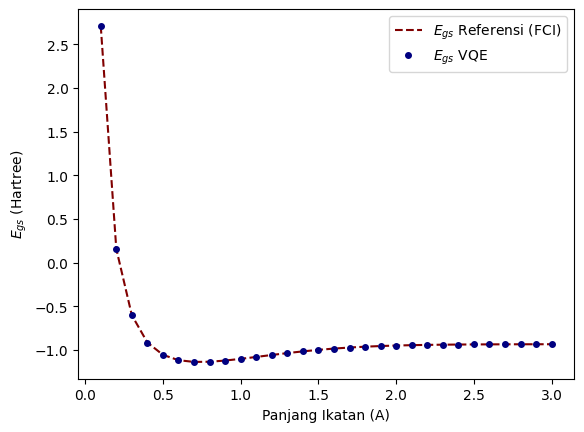

In [20]:
plt.plot(bond_length_fci, e_fci, color='maroon', linestyle="--", label='$E_{gs}$ Referensi (FCI)')
plt.plot(bond_length_fci, vqe_energy, marker='o', markersize=4, color="navy", linestyle='', label='$E_{gs}$ VQE')
plt.xlabel("Panjang Ikatan (A)")
plt.ylabel("$E_{gs}$ (Hartree)")
plt.legend()